In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Load Data (with variable assignment)
df = pd.read_excel(r"C:\Users\CHARUSAT\Documents\Business_forecasting\Vivomarketing.xlsx")

# Build Linear Regression Model
X = sm.add_constant(df['Marketing_Spend'])
y = df['Sales']
model = sm.OLS(y, X).fit()

# Detect Heteroscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("P-value before fixing:", bp_test[1])

# Fix Heteroscedasticity using Log Transformation
df['Log_Sales'] = np.log(df['Sales'])
model_fixed = sm.OLS(df['Log_Sales'], X).fit()

# Detect Heteroscedasticity Again
bp_test_fixed = het_breuschpagan(model_fixed.resid, X)
print("P-value after fixing:", bp_test_fixed[1])

# Predict Sales (Cross-Sectional Forecasting)
df['Predicted_Sales'] = np.exp(model_fixed.predict(X))

# Display Result
print(df[['Marketing_Spend', 'Sales', 'Predicted_Sales']])


P-value before fixing: 4.1804559077556505e-12
P-value after fixing: 0.274150423039872
     Marketing_Spend  Sales  Predicted_Sales
0             276.12  26.52        21.345095
1              53.40  12.48        10.569999
2              20.64  11.16         9.531901
3             181.80  22.20        15.850345
4             216.96  15.48        17.710189
..               ...    ...              ...
195            45.84   9.12        10.320826
196           113.04  11.64        12.758736
197           212.40  15.36        17.457177
198           340.32  30.60        26.138459
199           278.52  16.08        21.507361

[200 rows x 3 columns]


P-value before fixing: 4.1804559077556505e-12


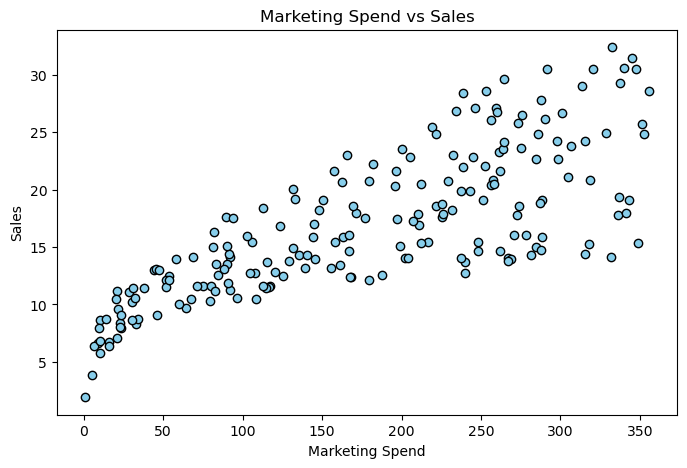

P-value after fixing: 0.274150423039872


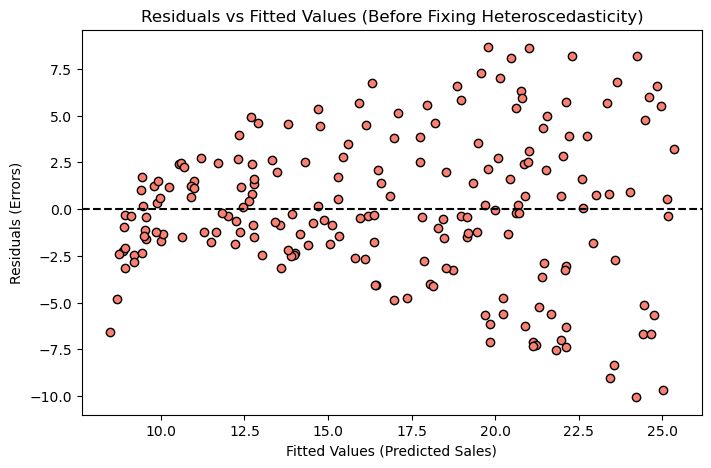

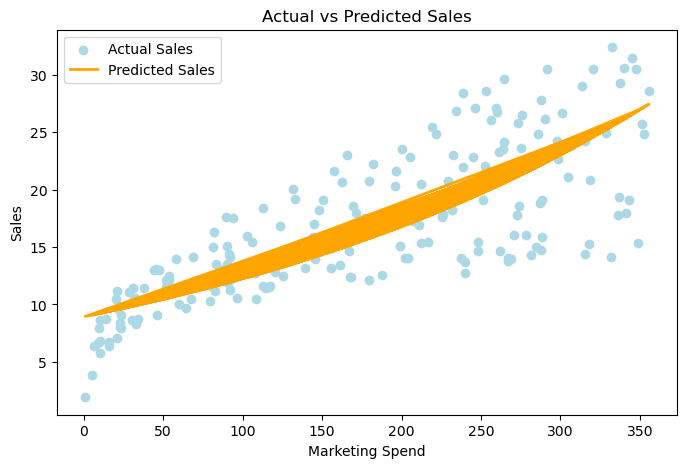

     Marketing_Spend  Sales  Predicted_Sales
0             276.12  26.52        21.345095
1              53.40  12.48        10.569999
2              20.64  11.16         9.531901
3             181.80  22.20        15.850345
4             216.96  15.48        17.710189
..               ...    ...              ...
195            45.84   9.12        10.320826
196           113.04  11.64        12.758736
197           212.40  15.36        17.457177
198           340.32  30.60        26.138459
199           278.52  16.08        21.507361

[200 rows x 3 columns]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Load Data
df = pd.read_excel(r"C:\Users\CHARUSAT\Documents\Business_forecasting\Vivomarketing.xlsx")

# Build Linear Regression Model
X = sm.add_constant(df['Marketing_Spend'])
y = df['Sales']
model = sm.OLS(y, X).fit()

# Detect Heteroscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("P-value before fixing:", bp_test[1])

#  Plot 1: Scatter Plot of Marketing Spend vs Sales
plt.figure(figsize=(8, 5))
plt.scatter(df['Marketing_Spend'], df['Sales'], color='skyblue', edgecolor='black')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.title('Marketing Spend vs Sales')
plt.show()

# Fix Heteroscedasticity using Log Transformation
df['Log_Sales'] = np.log(df['Sales'])
model_fixed = sm.OLS(df['Log_Sales'], X).fit()

# Detect Heteroscedasticity Again
bp_test_fixed = het_breuschpagan(model_fixed.resid, X)
print("P-value after fixing:", bp_test_fixed[1])

# Plot 2: Residuals vs Fitted Values (Before Fixing)
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, model.resid, color='salmon', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Fitted Values (Before Fixing Heteroscedasticity)')
plt.show()

# Predict Sales (Cross-Sectional Forecasting)
df['Predicted_Sales'] = np.exp(model_fixed.predict(X))

# Plot 3: Actual vs Predicted Sales
plt.figure(figsize=(8, 5))
plt.scatter(df['Marketing_Spend'], df['Sales'], color='lightblue', label='Actual Sales')
plt.plot(df['Marketing_Spend'], df['Predicted_Sales'], color='orange', label='Predicted Sales', linewidth=2)
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Display Result
print(df[['Marketing_Spend', 'Sales', 'Predicted_Sales']])


P-value before fixing: 4.1804559077556505e-12
P-value after fixing: 0.274150423039872


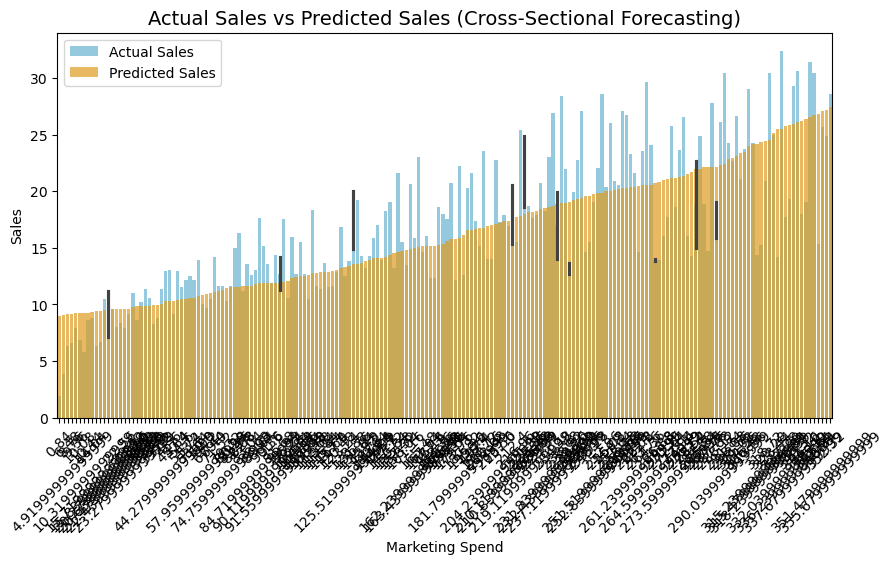

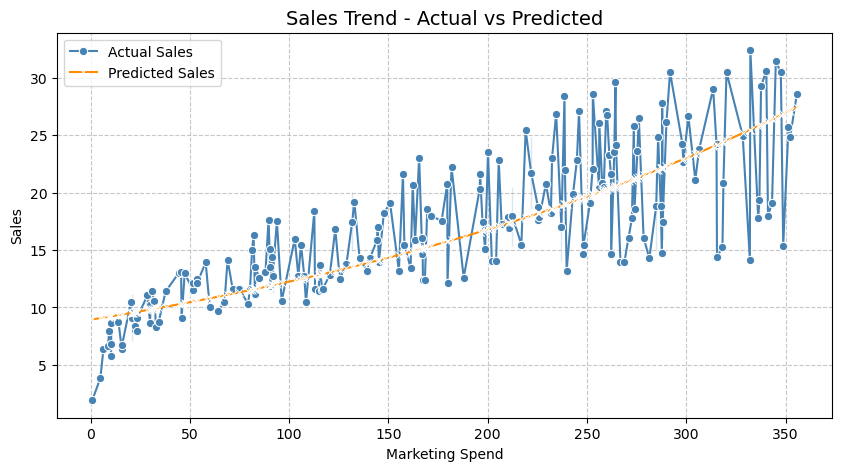

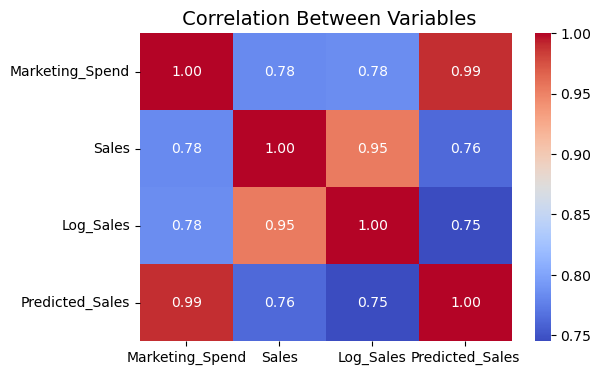

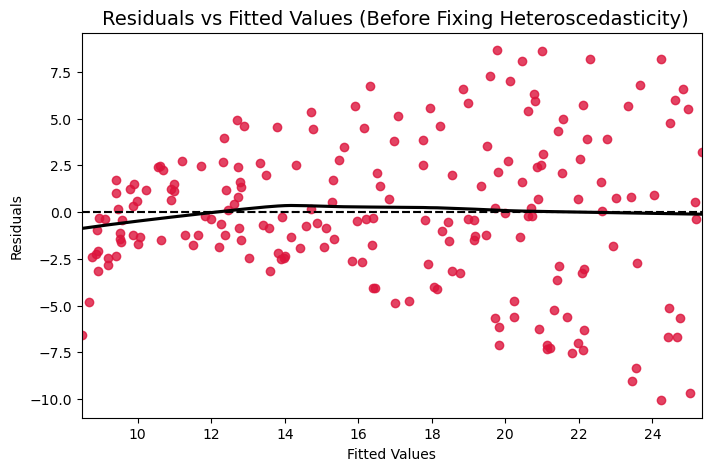

     Marketing_Spend  Sales  Predicted_Sales
0             276.12  26.52        21.345095
1              53.40  12.48        10.569999
2              20.64  11.16         9.531901
3             181.80  22.20        15.850345
4             216.96  15.48        17.710189
..               ...    ...              ...
195            45.84   9.12        10.320826
196           113.04  11.64        12.758736
197           212.40  15.36        17.457177
198           340.32  30.60        26.138459
199           278.52  16.08        21.507361

[200 rows x 3 columns]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Load Data
df = pd.read_excel(r"C:\Users\CHARUSAT\Documents\Business_forecasting\Vivomarketing.xlsx")

# Build Linear Regression Model
X = sm.add_constant(df['Marketing_Spend'])
y = df['Sales']
model = sm.OLS(y, X).fit()

#  Detect Heteroscedasticity
bp_test = het_breuschpagan(model.resid, X)
print("P-value before fixing:", bp_test[1])

# Fix Heteroscedasticity using Log Transformation
df['Log_Sales'] = np.log(df['Sales'])
model_fixed = sm.OLS(df['Log_Sales'], X).fit()

# Detect Heteroscedasticity Again
bp_test_fixed = het_breuschpagan(model_fixed.resid, X)
print("P-value after fixing:", bp_test_fixed[1])

# Predict Sales
df['Predicted_Sales'] = np.exp(model_fixed.predict(X))

# 1. Professional Bar Chart: Actual vs Predicted Sales
plt.figure(figsize=(10, 5))
sns.barplot(x='Marketing_Spend', y='Sales', data=df, color='skyblue', label='Actual Sales')
sns.barplot(x='Marketing_Spend', y='Predicted_Sales', data=df, color='orange', alpha=0.7, label='Predicted Sales')
plt.title('Actual Sales vs Predicted Sales (Cross-Sectional Forecasting)', fontsize=14)
plt.ylabel('Sales')
plt.xlabel('Marketing Spend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#  2. Beautiful Line Chart: Trend of Sales vs Marketing Spend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Marketing_Spend', y='Sales', data=df, marker='o', label='Actual Sales', color='steelblue')
sns.lineplot(x='Marketing_Spend', y='Predicted_Sales', data=df, marker='x', label='Predicted Sales', color='darkorange')
plt.title('Sales Trend - Actual vs Predicted', fontsize=14)
plt.ylabel('Sales')
plt.xlabel('Marketing Spend')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#  3. Heatmap: Correlation Between Variables
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Correlation Between Variables', fontsize=14)
plt.show()

#  4. Residual Plot: To Show Error Spread
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='crimson', line_kws={'color': 'black'})
plt.title(' Residuals vs Fitted Values (Before Fixing Heteroscedasticity)', fontsize=14)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#  5. Side-by-Side DataFrame Display
print(df[['Marketing_Spend', 'Sales', 'Predicted_Sales']])
